In [97]:
# read in data
import pandas
import utils

df = pandas.read_csv('../data/survey2024_headerscleaned.csv')

In [96]:
# map answers into estimated seniority level

# pre-postdoc
junior_positions = [
    "phd student", 
    "msc student", 
    "postgraduate student"
]

# postdoc to junior PI/assistant prof
midcareer_positions = [
    'staff scientist in a core facility',
    'junior group leader',
    "assistant professor",
    "postdoc",
    "postdoctoral researcher"
]

# associate prof+
leadership_positions = [
    "associate pofessor",
    "associate professor",
    "core facility head", 
    "professor",
    'director of data',
    "research director",
    "principal scientist",
    ]

# typically contain one or more of 
# {engineer, scientist, researcher, specialist, staff}
# but do not contain {manager, director, <other indication of seniority>}
staff_positions = [
    "clinical data scientist",
    "research software engineer",
    "research software engineer (with a strong interest in image analysis)",
    "industry scientist",
    "staff scientist researcher",
    "staff scientist researcher,",
    "microscopy research technician",
    "industrial materials scientist",
    "software application specialist",
    "bioimage analyst",
    "industry researcher",
    "it staff",
    "ai and analysis",
    "microscopy specialist",
    "research scientist",
    "staff scientist researcher",
    "research engineer",
    "staff engineer in a core facility",
]

 

In [94]:

# create options_dict for plot according to classification above
position_column = df['Which of these describe your position Choose all options that apply']
options_dict = {}

for i, value in enumerate(position_column):
    if not isinstance(value, str):
        assert str(value)=="nan"
        continue # some rows contain nan
    value = value.split(', ')
    for v in value:
        if not v:
            continue
        if v[0]==' ':
            v = v[1:]
        if v[-1]==' ':
            v = v[:-1]
        original_value = v
        v = v.lower() 
        mid = v in midcareer_positions
        lead = v in leadership_positions
        staff = v in staff_positions
        junior = v in junior_positions
        if not (mid or lead or staff or junior):
            raise ValueError(f"Unknown position: {v}")
        
        if v in junior_positions:
            options_dict[original_value]="junior"
        if v in midcareer_positions:
            options_dict[original_value]="mid-career"
        if v in leadership_positions:
            options_dict[original_value]="leader"
        if v in staff_positions:
            options_dict[original_value]="staff"


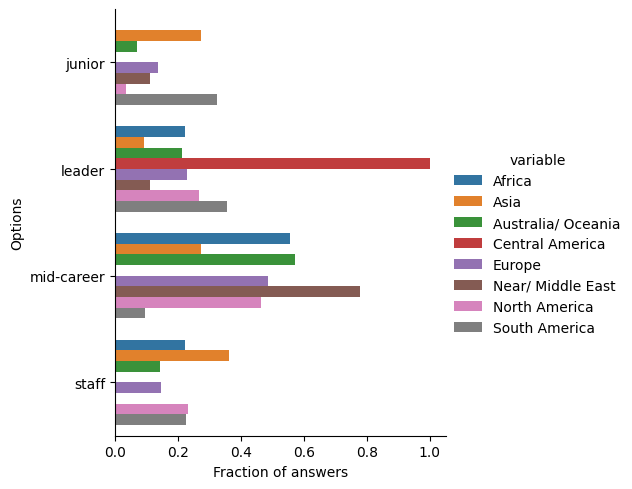

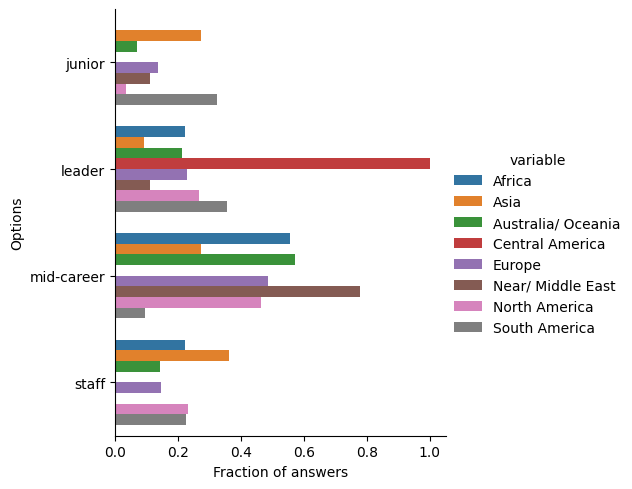

In [98]:
question_col = 'Which of these describe your position Choose all options that apply'
region_facet_col = 'What is your location'
utils.select_all_that_apply_hist_facet(df,question_col,'../figures/age_byregion_color.png',
                                       options_dict=options_dict,facet_col=region_facet_col,how='color')
utils.select_all_that_apply_hist_facet(df,question_col,'../figures/age_byregion_color.svg',
                                       options_dict=options_dict,facet_col=region_facet_col,how='color')
